In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\laira\OneDrive\Documents\RChem\machine_learning\carbon_dot_ml_data - Data.csv")

df.head(5)

,Carbon Dot,Synthesis Label,6M Sulfuric Acid (mL),Urea (grams),Citric Acid (grams),Positive or Negative at 365 nm excitation,Inhibition_(%),Conductivity,OH Presence,NH Presence,SH Presence,C=O Presence,CN Presence,MaxValue (Fluorecence Ex @ 400 nm),Emission Wavelength (Ex @ 400 nm)
0,syn_1,B1-1,0.423,0.1271,0.1274,NaN,-6.85976,1768.0,1,1,0,1,1,0.037919,403.1
1,syn_2,B1-2,1.577,0.1272,0.1274,NaN,-15.09150,3917.0,1,1,1,1,1,0.009542,483.1
2,syn_3,B1-3,0.423,0.4728,0.1271,Both,-14.02440,667.0,1,1,1,1,1,0.028918,506.7
3,syn_4,B1-4,1.577,0.4732,0.1273,NaN,-8.84146,2645.0,1,1,0,1,1,0.012842,401.1
4,syn_5,B1-5,0.423,0.1273,0.4734,NaN,-17.98780,971.0,1,1,1,1,1,0.010605,401.1


In [3]:
df = pd.read_csv(r"C:\Users\laira\OneDrive\Documents\RChem\machine_learning\carbon_dot_ml_data - Data.csv")

df.head(5)

,Carbon Dot,Synthesis Label,6M Sulfuric Acid (mL),Urea (grams),Citric Acid (grams),Positive or Negative at 365 nm excitation,Inhibition_(%),Conductivity,OH Presence,NH Presence,SH Presence,C=O Presence,CN Presence,MaxValue (Fluorecence Ex @ 400 nm),Emission Wavelength (Ex @ 400 nm)
0,syn_1,B1-1,0.423,0.1271,0.1274,NaN,-6.85976,1768.0,1,1,0,1,1,0.037919,403.1
1,syn_2,B1-2,1.577,0.1272,0.1274,NaN,-15.09150,3917.0,1,1,1,1,1,0.009542,483.1
2,syn_3,B1-3,0.423,0.4728,0.1271,Both,-14.02440,667.0,1,1,1,1,1,0.028918,506.7
3,syn_4,B1-4,1.577,0.4732,0.1273,NaN,-8.84146,2645.0,1,1,0,1,1,0.012842,401.1
4,syn_5,B1-5,0.423,0.1273,0.4734,NaN,-17.98780,971.0,1,1,1,1,1,0.010605,401.1


In [7]:
df['Emission Wavelength (Ex @ 400 nm)'].idxmax()

26

In [8]:
df.iloc[26]

Carbon Dot                                     syn_27
Synthesis Label                                  ML-5
6M Sulfuric Acid (mL)                             0.0
Urea (grams)                                   0.6002
Citric Acid (grams)                            0.6004
Positive or Negative at 365 nm excitation        Both
Inhibition_(%)                               8.231707
Conductivity                                    196.0
OH Presence                                         1
NH Presence                                         1
SH Presence                                         0
C=O Presence                                        1
CN Presence                                         1
MaxValue (Fluorecence Ex @ 400 nm)           0.002463
Emission Wavelength (Ex @ 400 nm)               636.5
Name: 26, dtype: object

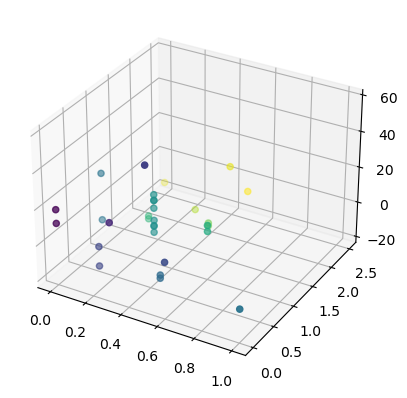

In [12]:
#from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection = '3d')

y = df['6M Sulfuric Acid (mL)']
x = df['Urea (grams)']
z = df['Inhibition_(%)']
c = x + y

ax.scatter(x, y, z, c = c)

plt.show()

[]

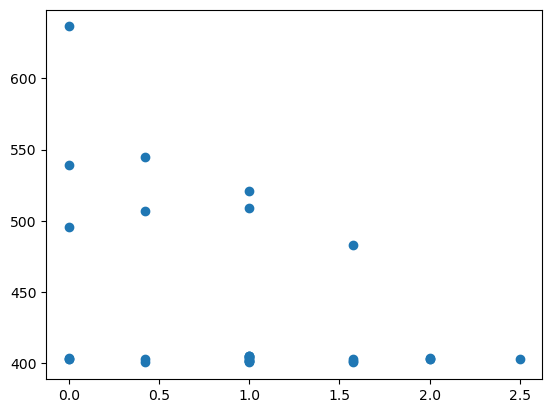

In [14]:
plt.scatter(df['6M Sulfuric Acid (mL)'], df['Emission Wavelength (Ex @ 400 nm)'])
plt.plot()

In [15]:
x = df[['Urea (grams)', '6M Sulfuric Acid (mL)']].values

y = df['Emission Wavelength (Ex @ 400 nm)'].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 60)

xscaler = RobustScaler()
yscaler = RobustScaler()
    
x_train = xscaler.fit_transform(x_train)
x_test = xscaler.transform(x_test)

y_train = yscaler.fit_transform(y_train.reshape(-1,1))

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(activation  = 'relu', batch_size = 6, random_state = 1, max_iter = 500)

model.fit(x_train, y_train)


ModuleNotFoundError: No module named 'sklearn'

In [7]:
model.score(x_test, y_test)

-90.638143141217

In [8]:
model.score(x_train, y_train)

0.8688804497802465

In [9]:
y_pred = model.predict(x_test)

y_pred = y_pred.reshape(-1,1)
y_pred = yscaler.inverse_transform(y_pred)

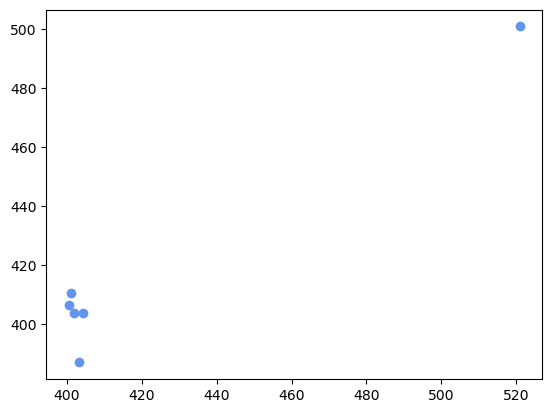

In [10]:
plt.scatter(y_test, y_pred, color = 'cornflowerblue')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [12]:
r2_score(y_test, y_pred)

0.9324580329551322

In [13]:
root_mean_squared_error(y_test, y_pred)

11.513117716479362